## Gradient Descent

Topics that are covered in this notebook:
- Solve a simple linear regression problem by gradient descent.
- We will check the trajectory in parameter space.
- Then we will apply Stochastic Gradient Descent (SGD) and figure out differences with standard one.
- The effect of __shuffling__ the data in SGD.

In [29]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# %matplotlib qt

### Data Generation

For simplicity we start with a data that we generate from known distribution. We consider just 2 features X1 and X2 for simplicity. The model is

$Y = bc + \theta_1X_1 + \theta_2X_2 + \epsilon$

or in general form we can say that

$Y = \Theta . X$ 

We consider $X_1$ and $X_2$ as random numbers with uniform distribution on the interval $[0,1]$, and the constant value, $c$, would be vector of ones. We consider disturbance (error term,  $\epsilon$) as a random noise with normal distribution in the range of $[0,0.5]$. We then consider the following specific values for the parameters:

- $b = 1$
- $\theta_1 = 3$
- $\theta_2 = 5$

In [30]:
# Make random numbers with a fixed seed to make sure we have the same data every time

np.random.seed(1000)

# number of observations
num_obs = 100

# Generate data based on introduced model
x1 = np.random.uniform(0, 10, num_obs)
x2 = np.random.uniform(0, 10, num_obs)
c = np.ones(num_obs)
e = np.random.normal(0, 0.5, num_obs)

# Parameters
b = 1
theta_1 = 3
theta_2 = 5

# Model 
y = b*c + theta_1*x1 + theta_2*x2 + e

# Making matrix of features
x = np.array([c,x1,x2]).T 

Plot $Y$ value versus $X_1$ and $X_2$.

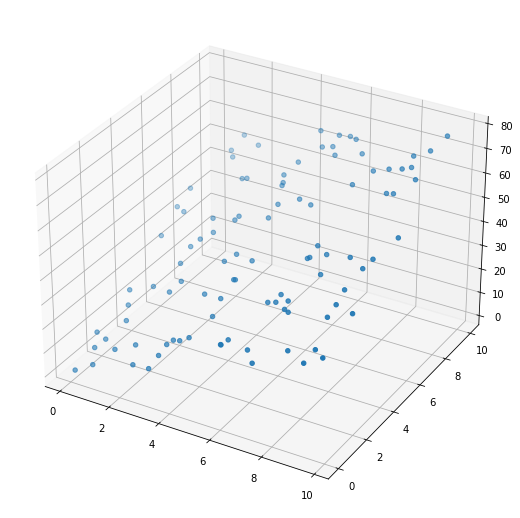

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(x1,x2,y)

### Solutions

In the following we will solve this problem via different methods:
- Directly using algebra
- Using `Linear Regression` method in `Scikit Learn` library in python
- By Gradient Descent
- By Stochastic Gradient Descent

#### Directly Using Algebra

We will use formuls $\theta = (X^TX)^{-1}X^Ty$ to directly find the solution, using `linalg` method in `numpy` library.

In [32]:
par = np.linalg.inv(np.dot(x.T,x)).dot(x.T).dot(y)
par = [round(p, 2) for p in par]
par

[0.86, 3.02, 4.99]

#### Using Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

# Setup model object and fit to data
lr = LinearRegression()
lr.fit(x,y)

# Coefficients
lr.coef_

array([0.        , 3.01672019, 4.99316641])

#### Using Gradient Descent

Examining this method is also useful as Neural Networks use this method for training.
We will examine three different method:
- Full-batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

#### Full-batch Gradient Descent

At first we should specify some parameters such as the length of each step (learning rate), number of iterations and also starting point for plotting. We can play with these parameters and see their effect on the results.

In [64]:
# Parameters
learning_rate = 1e-3 # Step Size
num_iter = 5000 # Number of iterations
theta_0 = np.array([3,3,3]) #

In the following we will define a `gradient_descent` function. Note that we use this function to just examine different parameters introduced above so we will keep track of the points we pass through and the amount of loss.

We define _cost function_ as $J(\beta_0, ..., \beta_n) = \frac{1}{2N}\sum_i^N Error_i^2$, where $Error_i = Y_{i, pred} - Y_{i, obs}$ or in other way $Error_i = \Theta.X - Y_{i, obs}$. We want to minimize this and for this purpose each time we do the step in the direction of $-\alpha \nabla J$, where here $\alpha$ is the step size (__learning rate__).

So in each step the new point based on the previous one would be:

\begin{align}
\Theta_{new} &=& \Theta_{old} - \alpha \nabla J \\
&=& \Theta_{old} - \alpha \times \nabla_{\Theta} (\frac{1}{2N}\sum_i^N Error_i^2) \\
&=& \Theta_{old} - \alpha \times (Y_{pred} - Y_{obs}).X
\end{align}


In [43]:
def gradient_descent(learning_rate, num_iter, theta_0):

    # Initialization
    theta = theta_0
    theta_path = np.zeros((num_iter+1,3)) # to keep track of points we path through
    theta_path[0,:] = theta_0

    cost = np.zeros(num_iter)

    for i in range(num_iter):
        y_pred = np.dot(theta.T, x.T)
        cost[i] = np.sum((y_pred-y)**2)/num_obs
        theta = theta - learning_rate/num_obs*(y_pred-y).dot(x)
        theta_path[i+1,:] = theta
    
    return theta_path, cost

Now we'll define some functions for plotting theta path:

In [62]:
true_coef = [b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
            marker='*', markersize=15, label='true coef', 
            color='b')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='gray', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='x', 
            markersize=15, label='start', color='r')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=10, label='finish', color='r')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, cost, learning_rate, num_iter, theta_0, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_0)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(cost)
    ax.set_ylim([0, 20])
    ax.set(xlabel='iterations', ylabel='cost function')
    ax.grid(True)

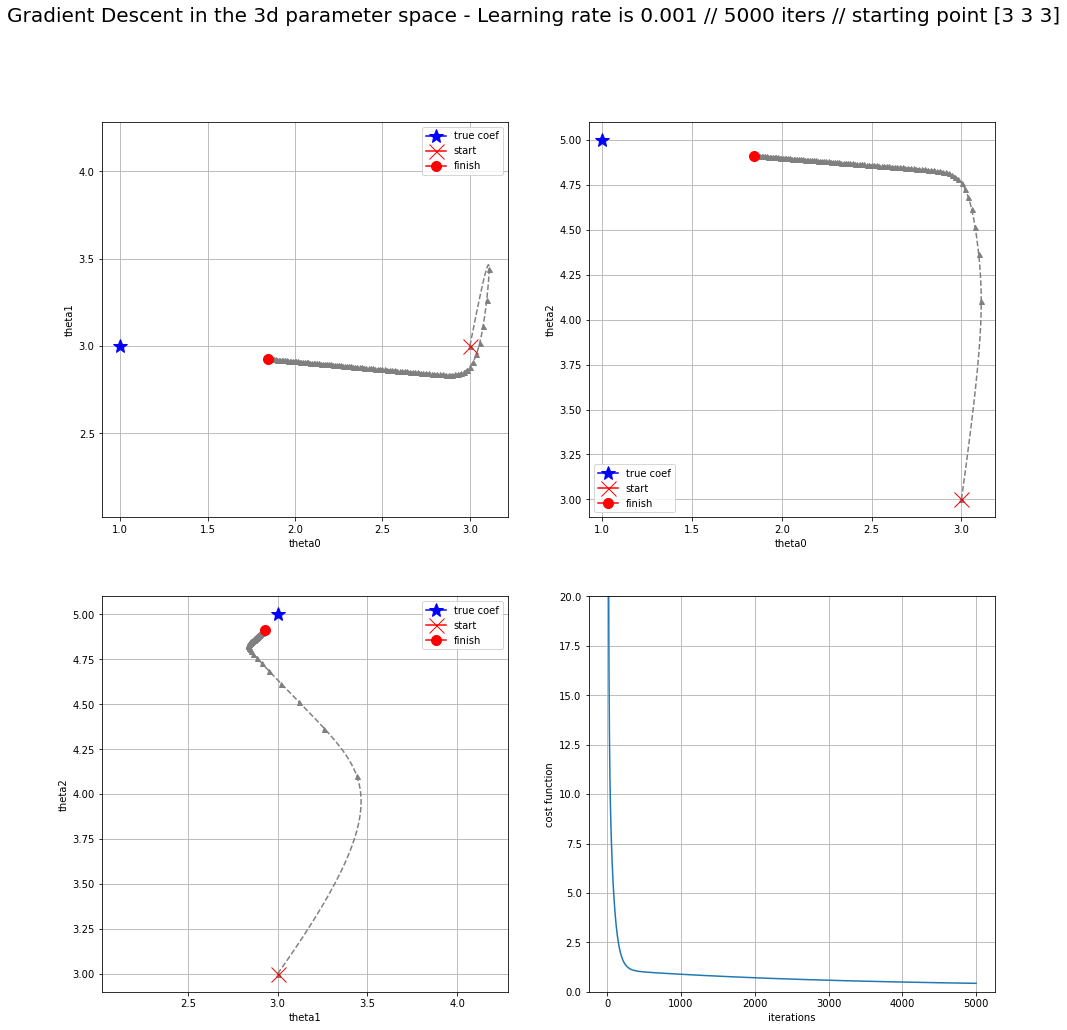

In [65]:
theta_path, cost = gradient_descent(learning_rate, num_iter, theta_0)
plot_all(theta_path, cost, learning_rate, num_iter, theta_0)

In the continue we will examine also Stochastic Gradient Descent (SGD) and compare it with the standard method.

#### Stochastic Gradient Descent

Now using Stochastic Gradient Descent instead of averaging over whole observations we would do the step with each observation data. So the function would be differ is some minor parts, but the  main difference is another loop over observations inside iteration loop and doing step with each of datapoints. Definitley, the number of path points increase by multiplication of `num_obs`.

We also define a new boolean variable `randomness`, which it is supposed to diminish the bias in the result due to the ordering of the dataset. So if this variable is `True`, it means that in each step we would select one of the observations randomly.

In [70]:
# Parameters
learning_rate = 1e-3 # Step Size
num_iter = 50 # Number of iterations
theta_0 = np.array([3,3,3]) #

In [77]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_0, randomness=False):

    # Initialization
    theta = theta_0
    theta_path = np.zeros(((num_iter*num_obs)+1,3)) # to keep track of points we path through
    theta_path[0,:] = theta_0

    cost = np.zeros(num_iter*num_obs)

    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            if randomness:
                j = np.random.randint(0,num_obs)
            y_pred = np.dot(theta.T, x.T)
            cost[count] = np.sum((y_pred-y)**2)/num_obs
            theta = theta - learning_rate*(y_pred[j]-y[j])*x[j,:]
            theta_path[count+1,:] = theta

            count += 1
    
    return theta_path, cost

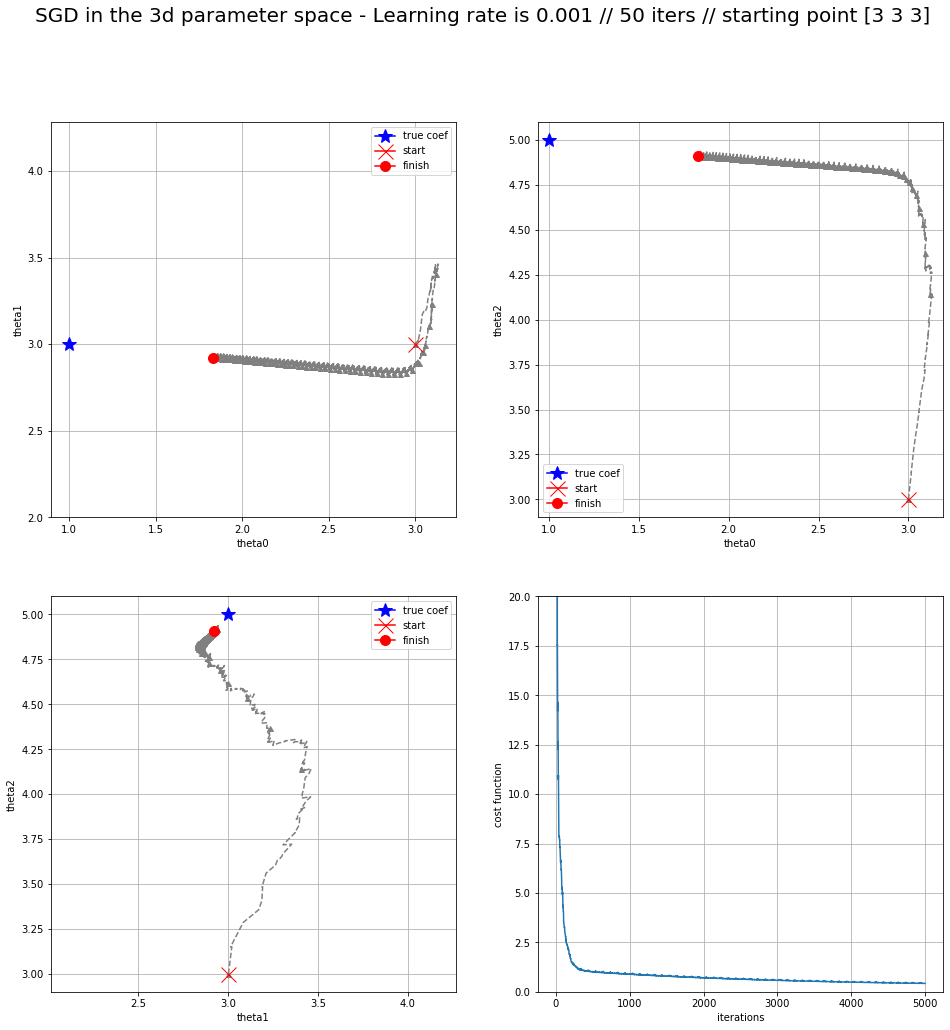

In [78]:
theta_path, cost = stochastic_gradient_descent(learning_rate, num_iter, theta_0)
plot_all(theta_path, cost, learning_rate, num_iter, theta_0, 'SGD')

In the following we trun on the randomness and you can see that we would have a bit more squiggly path. But this randomness we won't have patterns biased by the ordering of the dataset and it's not dependent on the ordering of the dataframe. 

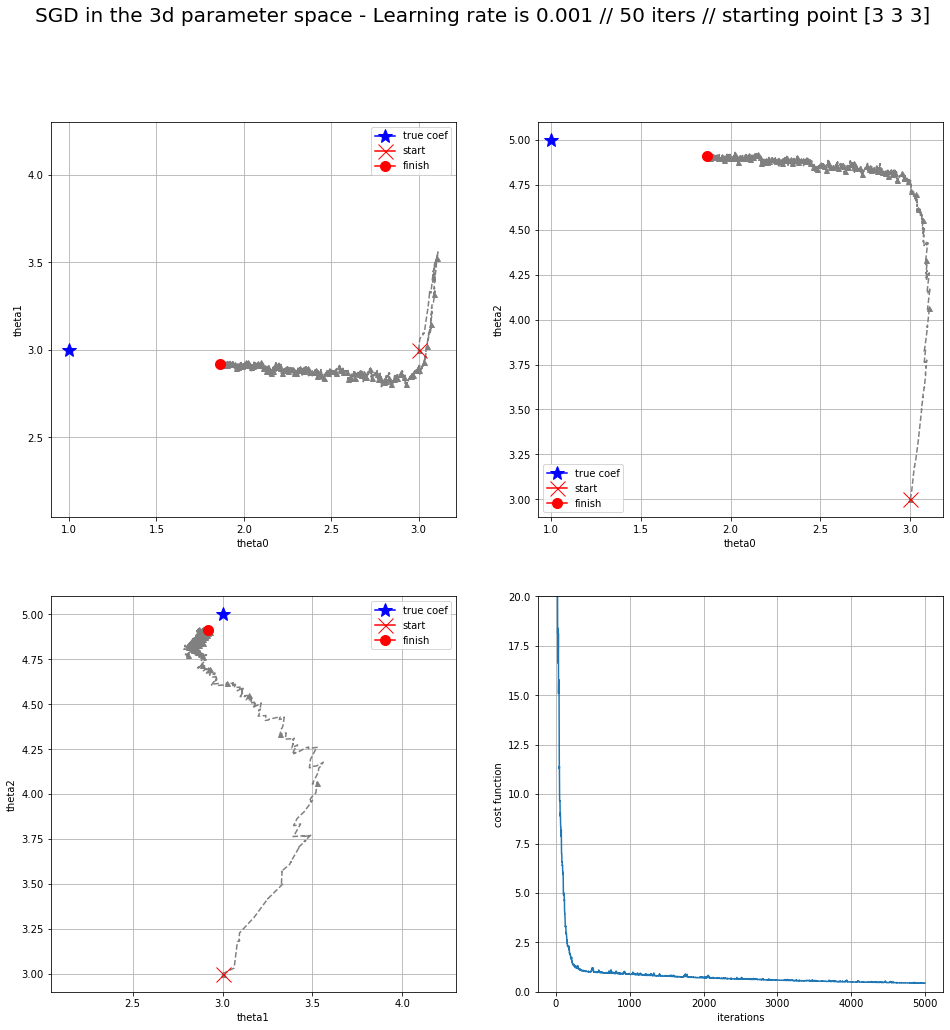

In [79]:
theta_path, cost = stochastic_gradient_descent(learning_rate, num_iter, theta_0, True)
plot_all(theta_path, cost, learning_rate, num_iter, theta_0, 'SGD')